In [ ]:
'''
Programming team: Oktawian Filipkowski, Maciej Zakrzewski
Exercise 3:
Neural network should recognize clothing items.
We will use Fashion minst dataset which is already sorted into training
and test sets.

We wil, start with necessary imports and downloads
'''

import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
'''
Now we check shapes of our data
'''

train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
'''
Now we create class names and check how many are there
'''

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

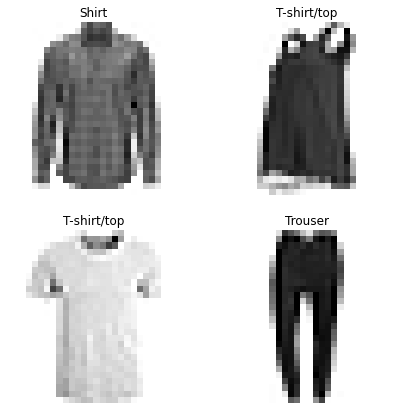

In [ ]:
'''
Now lets check multiple images from our dataset
'''

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
'''
Now we need to do few things:
Define input shape (size of our image)
Define output shape so its identical number to our number of classes
Define multiclass loss function
And check accuracy
'''

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) 

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

In [ ]:
'''
30% Accuracy is quite a nice number.
We will try to increase it.
Now we need to normalize our data
'''

train_data.min(), train_data.max()

(0, 255)

In [ ]:
'''
Lets divide by 255 to have our results be either 0 or 1
'''

train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
'''
Now lets check our results with data normalized on the same model
'''

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])


model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

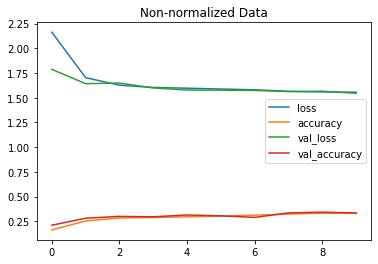

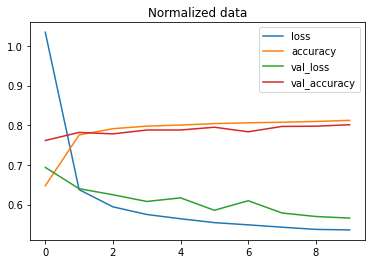

In [ ]:
'''
As we can see, with data normalized our accuracy is nearing 80.
Since 80s were one of best decades, we will leave it at that
Let's create visualization of non-normalized data vs normalized data
'''

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [ ]:
'''
As we can see, normalized data improved much quicker than non-normalized.
We could improve its accuracy by training it longer, but lets leave it at that.
Now let's create confusion matrix to visualize how our model is perfoming

Making prediction with model_2
'''

y_probs = model_2.predict(test_data)
y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

313/313 [==============================] - 0s 1ms/step


array([[739,  30,  27,  82,  37,   0,  71,   0,  14,   0],
       [  0, 954,   1,  21,  15,   0,   8,   0,   1,   0],
       [ 28,   1, 522,   9, 369,   0,  47,   0,  23,   1],
       [ 36,  40,   8, 757, 113,   0,  14,   0,  32,   0],
       [  1,   2,  32,  13, 929,   0,  11,   0,   9,   3],
       [  0,   0,   2,   0,   1, 238,   0,  95, 101, 563],
       [151,  17, 122,  43, 486,   0, 154,   0,  26,   1],
       [  0,   0,   0,   0,   0,   1,   0, 841,   2, 156],
       [  3,   1,  12,  12,  34,   0,   0,   3, 919,  16],
       [  0,   0,   1,   0,   3,   0,   0,  16,   2, 978]])

In [ ]:
'''
More redeable version
'''

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

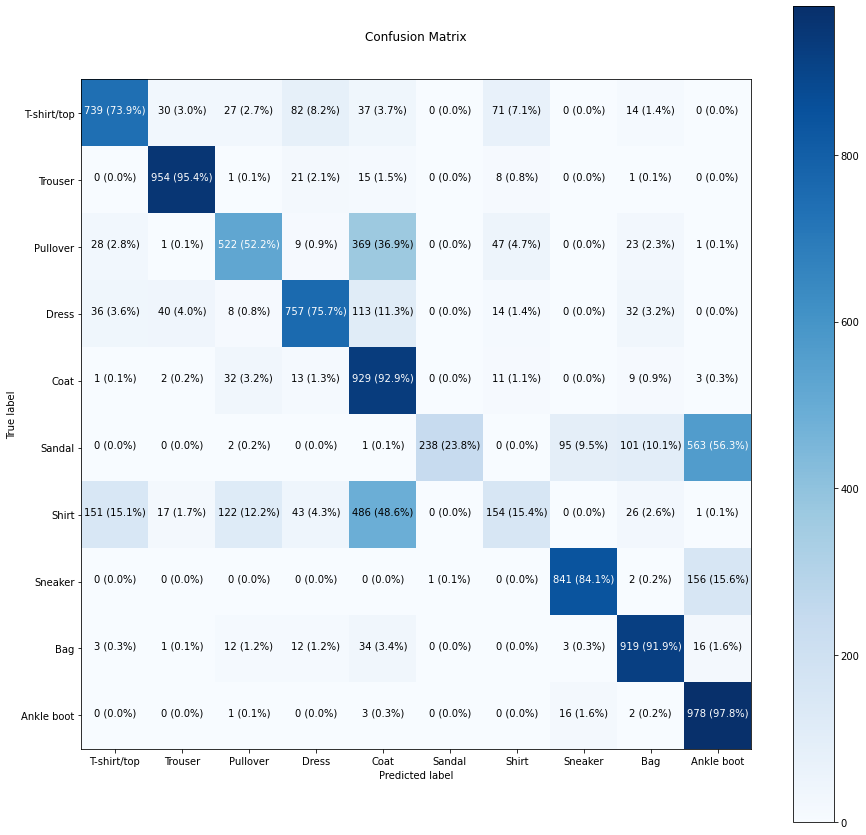

In [ ]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
'''
Now lets try our model, we will plot random image and check its prediction
'''

def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) 
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


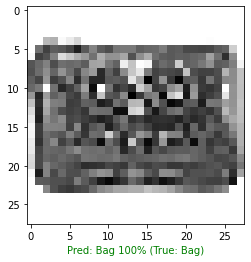

In [ ]:
'''
Now let's check our prediction on model 2
'''

plot_random_image(model=model_2, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)